In [2]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

## Curva precision-recall

Para poder utilizarla hay que tratar con datos binarios. si buscais en la documentación de scikitlearn, veréis que os la la opción de multiclases, haciendo transformaciones previas. Sin embargo, hayque tratar con clases equilibradas, por lo que nuestra división dararía error.

En esta prueba, he hecho una division de nuestra variable target al azar, para aplicar dicha curva y acernos una idea mejor de lo que nos muestra.


In [30]:
data = pd.read_csv("datos-new.csv")

# Categorizamos la variable income 

def inc_groups(series):
    if series < 100000:
        return 1
    elif 100000 <= series < 200000000:
        return 2


data['T.H.I'] = data['T.H.I'].apply(inc_groups)

data['T.H.I'].value_counts(sort=False)

print(data.head())

   T.H.I   T.F.E   Tobacco  I.H.R.V  MCareExp  Tra.Exp  G.F.G.E  H.H.Age  \
0      2  204969    Smoker    90000      3469    50448        0       42   
1      2   50545    Smoker     4500       470     2100        0       40   
2      2   74240  NoSmoker    90000       545     4032        0       76   
3      2   57793    Smoker     7200      2320     2676        0       54   
4      2   87578  NoSmoker        0       240    39960        0       35   

   Floor.Area  House.Age  ...  Electricity               Young.Members  \
0          24         25  ...           Si  between 5 and 17 years old   
1          50         14  ...           Si  between 5 and 17 years old   
2          77         20  ...           Si                 No children   
3          40         18  ...           Si  between 5 and 17 years old   
4          45         10  ...           Si                 No children   

     Roof   TenueStatus    TypeHousehold         Worker  \
0  Strong    Fully_Paid  Extended Famil

In [31]:
#Definimos nuestra variable target

y = data[['T.H.I']]
X = data.drop('T.H.I', axis = 1)
n_classes = y.astype(int)
print(n_classes)
print(n_classes.dtypes)

#Dividimos nuestro dataset en train y test al 80% y 20%
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

      T.H.I
0         2
1         2
2         2
3         2
4         2
...     ...
6996      1
6997      2
6998      2
6999      2
7000      2

[7001 rows x 1 columns]
T.H.I    int64
dtype: object


In [32]:
# Extraemos solo las variables numéricas de nuestro xTrain y xTest

xtrainnum = xTrain.select_dtypes('number')
xtestnum = xTest.select_dtypes('number')

from sklearn import preprocessing

# Normalizamos nuestros datos con la función normalize

normalized_xtrain = preprocessing.scale(xtrainnum)
normalizaed_xtest = preprocessing.scale(xtestnum)

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Run classifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(normalized_xtrain, yTrain)
y_pred = classifier.predict(normalizaed_xtest)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [44]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yTest, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.20


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score

print(confusion_matrix(yTest,y_pred))

print(classification_report(yTest,y_pred))

[[265  52]
 [192 892]]
              precision    recall  f1-score   support

           1       0.58      0.84      0.68       317
           2       0.94      0.82      0.88      1084

    accuracy                           0.83      1401
   macro avg       0.76      0.83      0.78      1401
weighted avg       0.86      0.83      0.84      1401



Nota:

"If we label all individuals as class 1, then our recall goes to 1.0. We have a perfect classifier right? Well, not exactly. In the case of recall, when we increase the recall, we decrease the precision. Again, we intuitively know that a model that labels 100% of families as class 1 is probably not useful. Statistics provides us with the vocabulary to express our intuition: this new model would suffer from low precision, or the ability of a classification model to identify only the relevant data points."

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.20')

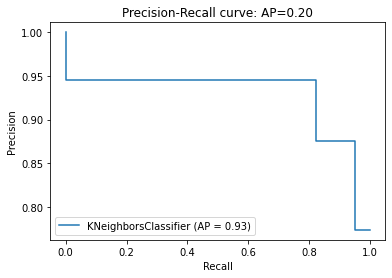

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, normalizaed_xtest, yTest)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))